In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import simplefilter
from pandas.core.common import SettingWithCopyWarning
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=SettingWithCopyWarning)

df = pd.read_csv('database.csv', low_memory=False)
#Can we determine if a crime was murder or manslaughter 
#Can we predict if a crime was a result of negligence

In [87]:
mask = df['Crime Solved'] == 'No'
df = df[~mask]

df = df.drop('Crime Solved', axis = 1)

df = df.drop("Record ID", axis = 1)
df = df.drop("Agency Code", axis = 1)
df = df.drop("Victim Ethnicity", axis = 1)
df = df.drop("Perpetrator Ethnicity", axis = 1)

col = df.columns

df['Perpetrator Age'] = df['Perpetrator Age'].astype(int)

mask = df['Perpetrator Age'] < 3
df_0 = df[mask]
df = df[~mask]

avg = round(df['Perpetrator Age'].mean())

df_0['Perpetrator Age'] = avg

df = pd.concat([df, df_0], axis = 0)

In [88]:
avg = round(df['Victim Age'].mean())

imask = df['Victim Age'] == 998
df_1 = df[imask]
df = df[~imask]

df_1['Victim Age'] = avg
df = pd.concat([df, df_1], axis = 0)

df

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0,FBI
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0,FBI
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0,FBI
5,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Male,30,White,Male,36,White,Acquaintance,Rifle,0,0,FBI
6,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632376,Winston-Salem,Municipal Police,Forsyth,North Carolina,2014,March,2,Murder or Manslaughter,Male,34,Black,Male,31,Black,Unknown,Gun,0,0,FBI
632684,Warren County,Sheriff,Warren,North Carolina,2014,October,1,Murder or Manslaughter,Male,34,White,Male,31,Black,Stranger,Handgun,0,1,FBI
633951,Otsego County,Sheriff,Otsego,New York,2014,May,1,Murder or Manslaughter,Male,34,White,Male,31,White,Friend,Unknown,0,0,FBI
637416,Houston,Municipal Police,Harris,Texas,2014,December,25,Murder or Manslaughter,Male,34,Black,Male,31,Black,Stranger,Firearm,0,1,FBI


       Agency Name       Agency Type         City       State   Month  \
count       448172            448172       448172      448172  448172   
unique        8932                 7         1775          51      12   
top       New York  Municipal Police  Los Angeles  California    July   
freq         19212            336009        26701       63414   41468   

                    Crime Type Victim Sex Victim Race Perpetrator Sex  \
count                   448172     448172      448172          448172   
unique                       2          3           5               3   
top     Murder or Manslaughter       Male       White            Male   
freq                    439444     337572      235186          399482   

       Perpetrator Race  Relationship   Weapon Record Source  
count            448172        448172   448172        448172  
unique                5            28       16             2  
top               White  Acquaintance  Handgun           FBI  
freq            

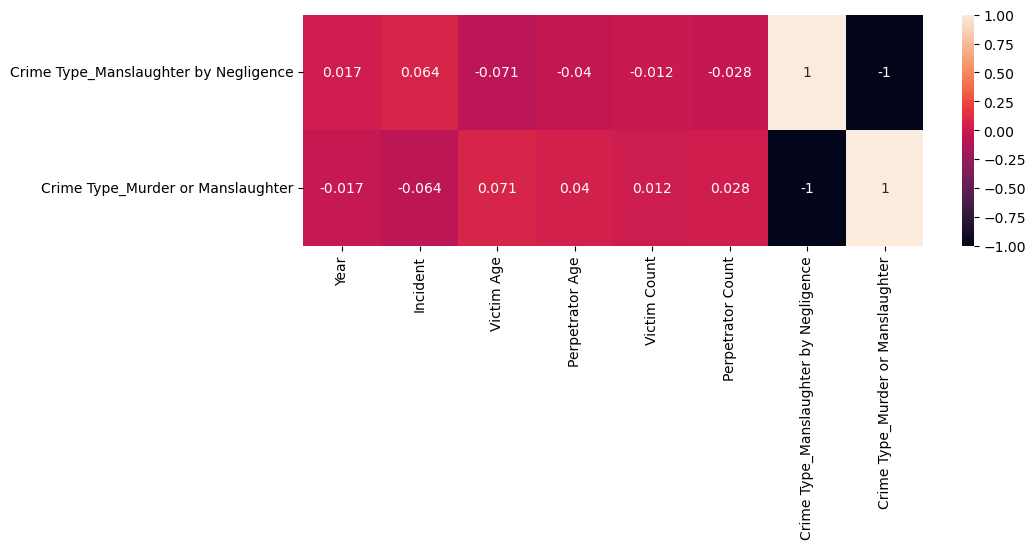

In [89]:
#Run Test to Determine Highest Homicide Cities, and States then graph those ones

print(df.describe(include = 'object'))

data_dummies=pd.get_dummies(df, columns = ['Crime Type'])
corr_dat = data_dummies.corr()

columns = ['Crime Type_Manslaughter by Negligence', 'Crime Type_Murder or Manslaughter']

selCol = corr_dat.copy()
mask = selCol.columns.isin(columns)
selCol = selCol.drop(selCol.loc[:, ~mask])
fig , ax = plt.subplots(figsize = (10, 3))
selCol.head()
hmap = sns.heatmap(selCol, vmin=-1, vmax=1, annot=True)

In [90]:
df['Crime Type'] = df['Crime Type'].astype('category')
df['Crime Type'] = df['Crime Type'].cat.codes

uniVal = df.State.unique()

murStates = []
negStates = []

for i in uniVal:
    df2 = (df['Incident'][(df['State']==i) & (df['Crime Type']==1)])
    murStates.append(len(df2))
    df2 = (df['Incident'][(df['State']==i) & (df['Crime Type']==0)])
    negStates.append(len(df2))

murStates = np.asfarray(murStates)
negStates = np.asfarray(negStates)

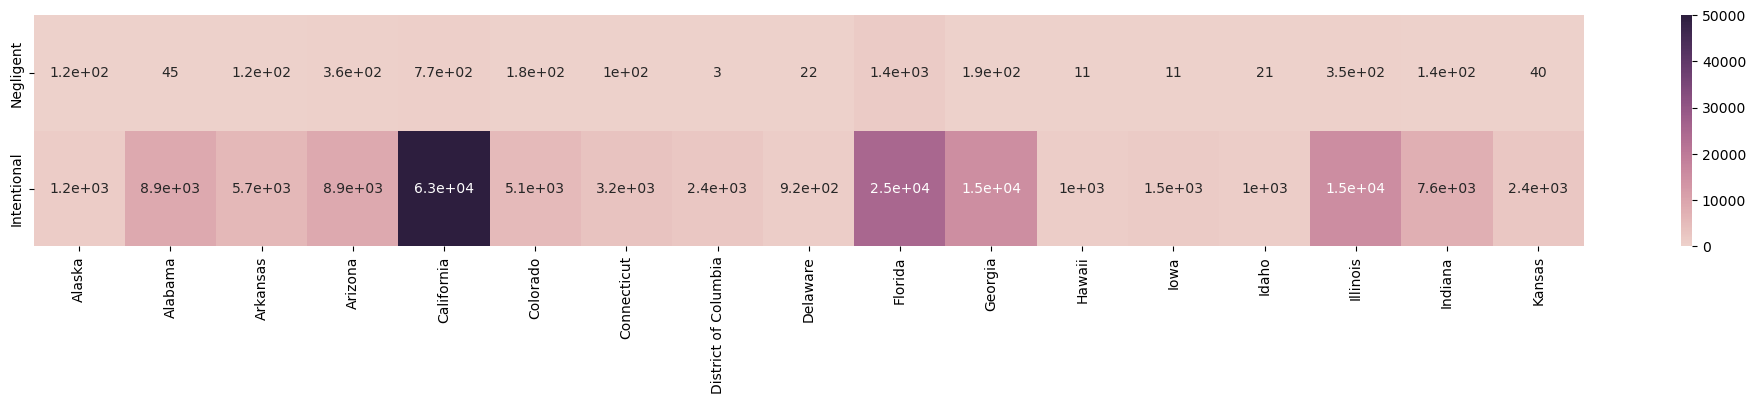

In [91]:

df_States = pd.DataFrame(columns = [i for i in uniVal])
df_States = df_States.append(pd.Series(negStates, index=df_States.columns), ignore_index=True)
df_States = df_States.append(pd.Series(murStates, index=df_States.columns), ignore_index=True)
#df_States.head()

dfCopy = df_States.iloc[:, 0:17]

dfCopy = dfCopy.rename(index={0: 'Negligent', 1: 'Intentional'})

fig , ax = plt.subplots(figsize = (25, 3))
hmap = sns.heatmap(dfCopy, vmin=0, vmax=50000, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

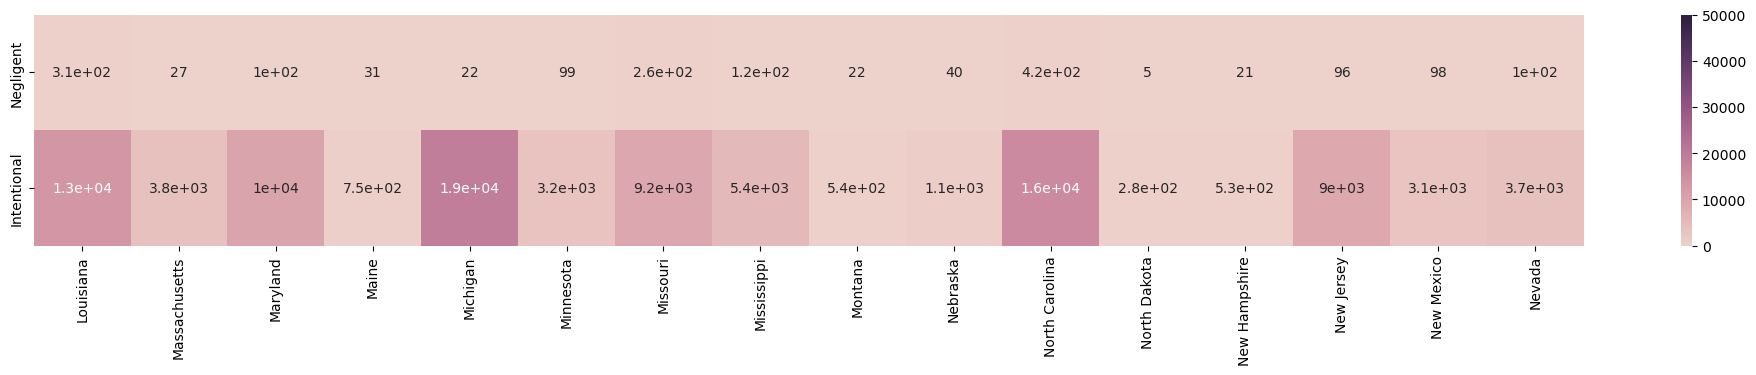

In [92]:
dfCopy = df_States.iloc[:, 18:34]

dfCopy = dfCopy.rename(index={0: 'Negligent', 1: 'Intentional'})

fig , ax = plt.subplots(figsize = (25, 3))
hmap = sns.heatmap(dfCopy, vmin=0, vmax=50000, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

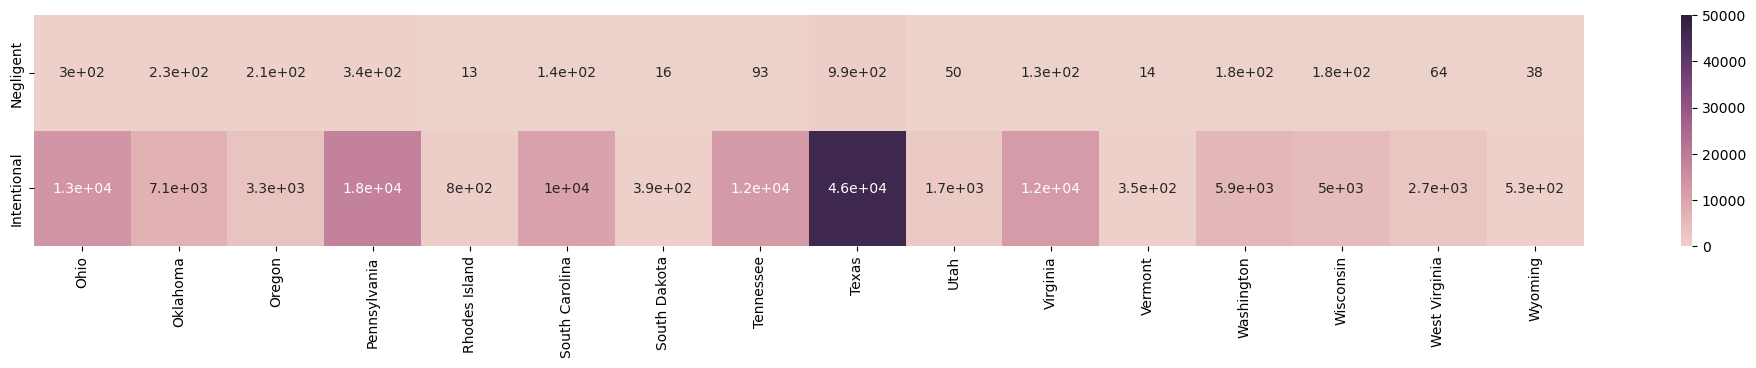

In [93]:
dfCopy = df_States.iloc[:, 35:51]

dfCopy = dfCopy.rename(index={0: 'Negligent', 1: 'Intentional'})

fig , ax = plt.subplots(figsize = (25, 3))
hmap = sns.heatmap(dfCopy, vmin=0, vmax=50000, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [94]:
df['Perpetrator Age'] = np.log(df['Perpetrator Age'] + 1)
df['Victim Age'] = np.log(df['Victim Age'] + 1)

df['Perpetrator Count'] = np.log(df['Perpetrator Count'] + 1)
df['Victim Count'] = np.log(df['Victim Count'] + 1)

df['Incident'] = np.log(df['Incident'] + 1)

df['Record Source'] = df['Record Source'].astype('category')
df['Record Source'] = df['Record Source'].cat.codes

df['Month'] = df['Month'].astype('category')
df['Month'] = df['Month'].cat.codes

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)


data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (336129, 8)
X_train_l1.shape: (336129, 4)


In [96]:
X_test_l1 = select.transform(X_test)
log_reg_1 = LogisticRegression(max_iter=1000000).fit(X_train_l1, y_train)
score=log_reg_1.score(X_test_l1, y_test)
y_pred = log_reg_1.predict(X_test_l1)
print("Test score: {:.3f}".format(score))

Test score: 0.980


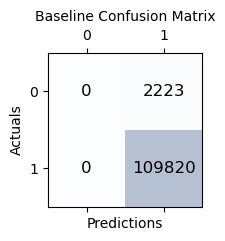

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Baseline Confusion Matrix', fontsize=10)
plt.show()

In [98]:
from sklearn.metrics import roc_auc_score
select_auc_1 = roc_auc_score(y_test, log_reg_1.predict_proba(X_test_l1)[:, 1]) 

In [99]:
quickDrop = df.copy()

mask = quickDrop['Crime Type'] == 1
quickDrop = quickDrop[~mask]

df_City_neg = quickDrop['City'].value_counts()

#print(df_City_neg.index)

df_City_neg = df_City_neg.to_frame()


In [100]:
df_City_neg.head(15)

,City
Dade,299
Harris,292
Cook,281
Maricopa,237
Los Angeles,178
Orange,154
Bexar,140
Hillsborough,133
Jefferson,127
Palm Beach,123


In [101]:
keepList = [df_City_neg.iloc[:50].index]
      
#print(keepList)

In [102]:
df_CityDrop = df['City']

df_CityDropDum = pd.get_dummies(df_CityDrop)

#print(df_CityDropDum.head())

df_CityKeep = pd.DataFrame()

for i in keepList:
    df_CityKeep = pd.concat([df_CityKeep, df_CityDropDum[i]], axis = 1)
    
#print(df_CityKeep.head())

In [103]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)

df_dumCopy = pd.concat([df_dumCopy, df_CityKeep], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l2 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l2.shape: {}".format(X_train_l2.shape))

X_train.shape: (336129, 58)
X_train_l2.shape: (336129, 29)


In [104]:
X_test_l2 = select.transform(X_test)
log_reg_2 = LogisticRegression(max_iter=1000000).fit(X_train_l2, y_train)
score=log_reg_2.score(X_test_l2, y_test)
y_pred = log_reg_2.predict(X_test_l2)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [105]:
select_auc_2 = roc_auc_score(y_test, log_reg_2.predict_proba(X_test_l2)[:, 1]) 

In [106]:
quickDrop = df.copy()

mask = quickDrop['Crime Type'] == 1
quickDrop = quickDrop[~mask]

df_Agency_neg = quickDrop['Agency Name'].value_counts()

#print(df_Agency_neg.index)

df_Agency_neg = df_Agency_neg.to_frame()

In [107]:
df_Agency_neg.head(15)

,Agency Name
Chicago,253
Houston,231
Miami-Dade,198
San Antonio,135
Phoenix,133
Jacksonville,106
Los Angeles,87
Miami,73
Alaska State Police,64
Orange County,59


In [108]:
keepList = [df_Agency_neg.iloc[:50].index]
      
#print(keepList)

In [109]:
df_AgencyDrop = df['Agency Name']

df_AgencyDropDum = pd.get_dummies(df_AgencyDrop)

#print(df_CityDropDum.head())

df_AgencyKeep = pd.DataFrame()

for i in keepList:
    df_AgencyKeep = pd.concat([df_AgencyKeep, df_AgencyDropDum[i]], axis = 1)
    

In [110]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)

df_dumCopy = pd.concat([df_dumCopy, df_AgencyKeep], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l3 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l3.shape: {}".format(X_train_l3.shape))

X_train.shape: (336129, 58)
X_train_l3.shape: (336129, 29)


In [111]:
X_test_l3 = select.transform(X_test)
log_reg_3 = LogisticRegression(max_iter=1000000).fit(X_train_l3, y_train)
score=log_reg_3.score(X_test_l3, y_test)
y_pred = log_reg_3.predict(X_test_l3)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [112]:
select_auc_3 = roc_auc_score(y_test, log_reg_3.predict_proba(X_test_l3)[:, 1]) 

In [113]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
#df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l4 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l4.shape: {}".format(X_train_l4.shape))

X_train.shape: (336129, 24)
X_train_l4.shape: (336129, 12)


In [114]:
X_test_l4 = select.transform(X_test)
log_reg_4 = LogisticRegression(max_iter=1000000).fit(X_train_l4, y_train)
score=log_reg_4.score(X_test_l4, y_test)
y_pred = log_reg_4.predict(X_test_l4)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [115]:
select_auc_4 = roc_auc_score(y_test, log_reg_4.predict_proba(X_test_l4)[:, 1]) 

In [116]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
#df_dumCopy = df_dumCopy.drop(['State'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l5 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l5.shape: {}".format(X_train_l5.shape))

X_train.shape: (336129, 59)
X_train_l5.shape: (336129, 30)


In [117]:
X_test_l5 = select.transform(X_test)
log_reg_5 = LogisticRegression(max_iter=1000000).fit(X_train_l5, y_train)
score=log_reg_5.score(X_test_l5, y_test)
y_pred = log_reg_5.predict(X_test_l5)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [118]:
select_auc_5 = roc_auc_score(y_test, log_reg_5.predict_proba(X_test_l5)[:, 1]) 

In [119]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
#df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l6 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l6.shape: {}".format(X_train_l6.shape))

X_train.shape: (336129, 13)
X_train_l6.shape: (336129, 7)


In [120]:
X_test_l6 = select.transform(X_test)
log_reg_6 = LogisticRegression(max_iter=1000000).fit(X_train_l6, y_train)
score=log_reg_6.score(X_test_l6, y_test)
y_pred = log_reg_6.predict(X_test_l6)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [121]:
select_auc_6 = roc_auc_score(y_test, log_reg_6.predict_proba(X_test_l6)[:, 1]) 

In [122]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
#df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l7 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l7.shape: {}".format(X_train_l7.shape))

X_train.shape: (336129, 13)
X_train_l7.shape: (336129, 7)


In [123]:
X_test_l7 = select.transform(X_test)
log_reg_7 = LogisticRegression(max_iter=1000000).fit(X_train_l7, y_train)
score=log_reg_7.score(X_test_l7, y_test)
y_pred = log_reg_7.predict(X_test_l7)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [124]:
select_auc_7 = roc_auc_score(y_test, log_reg_7.predict_proba(X_test_l7)[:, 1]) 

In [125]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
#df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l8 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l8.shape: {}".format(X_train_l8.shape))

X_train.shape: (336129, 11)
X_train_l8.shape: (336129, 6)


In [126]:
X_test_l8 = select.transform(X_test)
log_reg_8 = LogisticRegression(max_iter=1000000).fit(X_train_l8, y_train)
score=log_reg_8.score(X_test_l8, y_test)
y_pred = log_reg_8.predict(X_test_l8)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [127]:
select_auc_8 = roc_auc_score(y_test, log_reg_8.predict_proba(X_test_l8)[:, 1]) 

In [128]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
#df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l9 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l9.shape: {}".format(X_train_l9.shape))

X_train.shape: (336129, 11)
X_train_l9.shape: (336129, 6)


In [129]:
X_test_l9 = select.transform(X_test)
log_reg_9 = LogisticRegression(max_iter=1000000).fit(X_train_l9, y_train)
score=log_reg_9.score(X_test_l9, y_test)
y_pred = log_reg_9.predict(X_test_l9)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [130]:
select_auc_9 = roc_auc_score(y_test, log_reg_9.predict_proba(X_test_l9)[:, 1]) 

In [131]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
#df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l10 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l10.shape: {}".format(X_train_l10.shape))

X_train.shape: (336129, 15)
X_train_l10.shape: (336129, 8)


In [132]:
X_test_l10 = select.transform(X_test)
log_reg_10 = LogisticRegression(max_iter=1000000).fit(X_train_l10, y_train)
score=log_reg_10.score(X_test_l10, y_test)
y_pred = log_reg_10.predict(X_test_l10)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [133]:
select_auc_10 = roc_auc_score(y_test, log_reg_10.predict_proba(X_test_l10)[:, 1]) 

In [134]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Race'], axis=1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Race'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Perpetrator Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Victim Sex'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Agency Type'], axis = 1)
#df_dumCopy = df_dumCopy.drop(['Relationship'], axis = 1)
df_dumCopy = df_dumCopy.drop(['Weapon'], axis = 1)
df_dumCopy = df_dumCopy.drop(['State'], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l11 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l11.shape: {}".format(X_train_l11.shape))

X_train.shape: (336129, 36)
X_train_l11.shape: (336129, 18)


In [135]:
X_test_l11 = select.transform(X_test)
log_reg_11 = LogisticRegression(max_iter=1000000).fit(X_train_l11, y_train)
score=log_reg_11.score(X_test_l11, y_test)
y_pred = log_reg_11.predict(X_test_l11)
print("Test score: {:.3f}".format(score))

Test score: 0.980


In [136]:
select_auc_11 = roc_auc_score(y_test, log_reg_11.predict_proba(X_test_l11)[:, 1]) 

In [137]:
df_dumCopy = df.copy()

df_dumCopy = df_dumCopy.drop(['Agency Name'], axis=1)
df_dumCopy = df_dumCopy.drop(['City'], axis = 1)

df_dumCopy = pd.concat([df_dumCopy, df_CityKeep], axis = 1)
df_dumCopy = pd.concat([df_dumCopy, df_AgencyKeep], axis = 1)

data_dummies=pd.get_dummies(df_dumCopy)

x = data_dummies.drop(['Crime Type'], axis=1)
y = data_dummies['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)

select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l12 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l12.shape: {}".format(X_train_l12.shape))

X_train.shape: (336129, 226)
X_train_l12.shape: (336129, 113)


In [138]:
X_test_l12 = select.transform(X_test)
log_reg_12 = LogisticRegression(max_iter=1000000).fit(X_train_l12, y_train)
score=log_reg_12.score(X_test_l12, y_test)
y_pred = log_reg_12.predict(X_test_l12)
print("Test score: {:.3f}".format(score))

Test score: 0.980


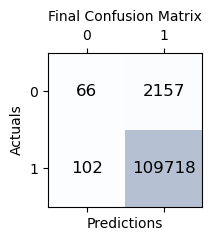

In [139]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Final Confusion Matrix', fontsize=10)
plt.show()

In [140]:
select_auc_12 = roc_auc_score(y_test, log_reg_12.predict_proba(X_test_l12)[:, 1]) 

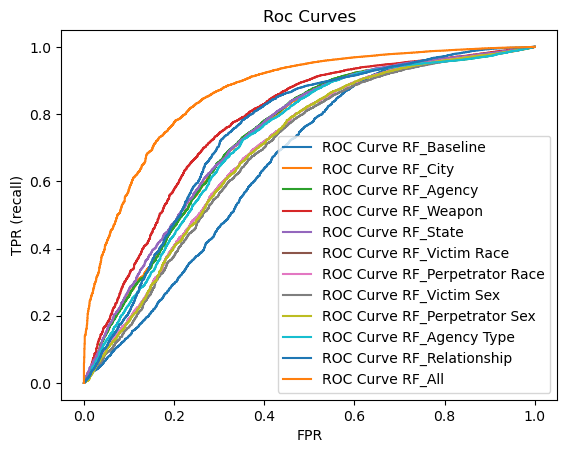

AUC for Logistic Regression RF_Baseline: 0.658
AUC for Logistic Regression RF_City: 0.734
AUC for Logistic Regression RF_Agency: 0.734
AUC for Logistic Regression RF_Weapon: 0.774
AUC for Logistic Regression RF_State: 0.740
AUC for Logistic Regression RF_Victim Race: 0.700
AUC for Logistic Regression RF_Perpetrator Race: 0.700
AUC for Logistic Regression RF_Victim Sex: 0.689
AUC for Logistic Regression RF_Perpetrator Sex: 0.698
AUC for Logistic Regression RF_Agency Type: 0.725
AUC for Logistic Regression RF_Relationship: 0.746
AUC for Logistic Regression RF_All: 0.866


In [141]:
#ROC CURVES
from sklearn.metrics import roc_curve
fpr_1, tpr_1, thresholds = roc_curve(y_test, log_reg_1.predict_proba(X_test_l1)[:, 1])
fpr_2, tpr_2, thresholds = roc_curve(y_test, log_reg_2.predict_proba(X_test_l2)[:, 1])
fpr_3, tpr_3, thresholds = roc_curve(y_test, log_reg_3.predict_proba(X_test_l3)[:, 1])
fpr_4, tpr_4, thresholds = roc_curve(y_test, log_reg_4.predict_proba(X_test_l4)[:, 1])
fpr_5, tpr_5, thresholds = roc_curve(y_test, log_reg_5.predict_proba(X_test_l5)[:, 1])
fpr_6, tpr_6, thresholds = roc_curve(y_test, log_reg_6.predict_proba(X_test_l6)[:, 1])
fpr_7, tpr_7, thresholds = roc_curve(y_test, log_reg_7.predict_proba(X_test_l7)[:, 1])
fpr_8, tpr_8, thresholds = roc_curve(y_test, log_reg_8.predict_proba(X_test_l8)[:, 1])
fpr_9, tpr_9, thresholds = roc_curve(y_test, log_reg_9.predict_proba(X_test_l9)[:, 1])
fpr_10, tpr_10, thresholds = roc_curve(y_test, log_reg_10.predict_proba(X_test_l10)[:, 1])
fpr_11, tpr_11, thresholds = roc_curve(y_test, log_reg_11.predict_proba(X_test_l11)[:, 1])
fpr_12, tpr_12, thresholds = roc_curve(y_test, log_reg_12.predict_proba(X_test_l12)[:, 1])


plt.plot(fpr_1, tpr_1, label="ROC Curve RF_Baseline")
plt.plot(fpr_2, tpr_2, label="ROC Curve RF_City")
plt.plot(fpr_3, tpr_3, label="ROC Curve RF_Agency")
plt.plot(fpr_4, tpr_4, label="ROC Curve RF_Weapon")
plt.plot(fpr_5, tpr_5, label="ROC Curve RF_State")
plt.plot(fpr_6, tpr_6, label="ROC Curve RF_Victim Race")
plt.plot(fpr_7, tpr_7, label="ROC Curve RF_Perpetrator Race")
plt.plot(fpr_8, tpr_8, label="ROC Curve RF_Victim Sex")
plt.plot(fpr_9, tpr_9, label="ROC Curve RF_Perpetrator Sex")
plt.plot(fpr_10, tpr_10, label="ROC Curve RF_Agency Type")
plt.plot(fpr_11, tpr_11, label="ROC Curve RF_Relationship")
plt.plot(fpr_12, tpr_12, label="ROC Curve RF_All")


plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4)
plt.title('Roc Curves')
plt.show()

print("AUC for Logistic Regression RF_Baseline: {:.3f}".format(select_auc_1)) 
print("AUC for Logistic Regression RF_City: {:.3f}".format(select_auc_2)) 
print("AUC for Logistic Regression RF_Agency: {:.3f}".format(select_auc_3)) 
print("AUC for Logistic Regression RF_Weapon: {:.3f}".format(select_auc_4))
print("AUC for Logistic Regression RF_State: {:.3f}".format(select_auc_5)) 
print("AUC for Logistic Regression RF_Victim Race: {:.3f}".format(select_auc_6)) 
print("AUC for Logistic Regression RF_Perpetrator Race: {:.3f}".format(select_auc_7))  
print("AUC for Logistic Regression RF_Victim Sex: {:.3f}".format(select_auc_8))  
print("AUC for Logistic Regression RF_Perpetrator Sex: {:.3f}".format(select_auc_9))  
print("AUC for Logistic Regression RF_Agency Type: {:.3f}".format(select_auc_10))  
print("AUC for Logistic Regression RF_Relationship: {:.3f}".format(select_auc_11))  
print("AUC for Logistic Regression RF_All: {:.3f}".format(select_auc_12)) 

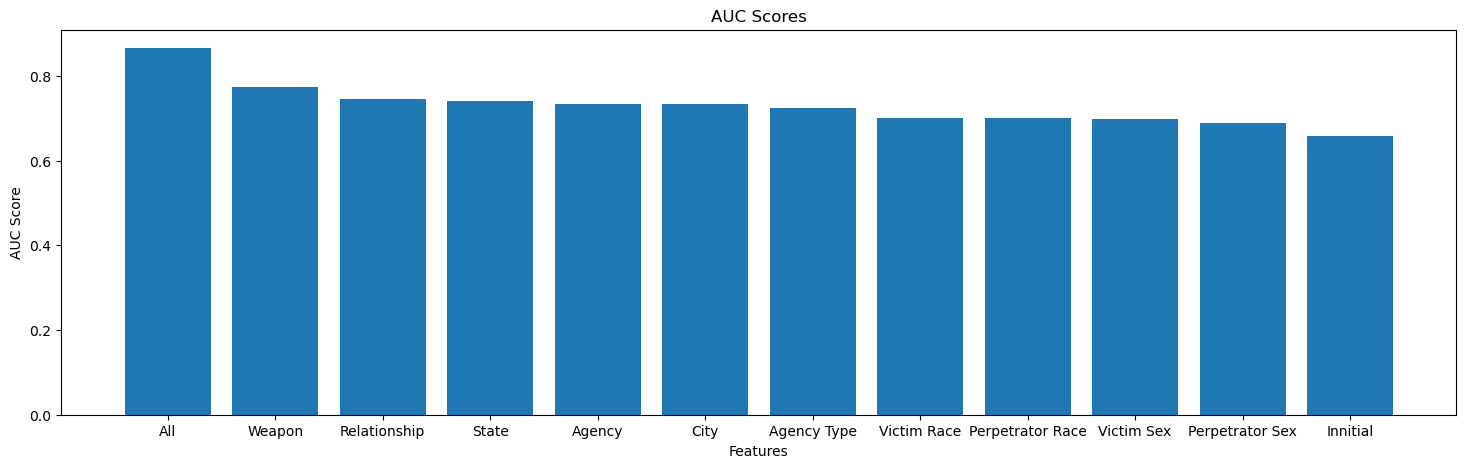

In [142]:


yb = [select_auc_1, select_auc_2,select_auc_3,select_auc_4,select_auc_5,select_auc_6,select_auc_7,select_auc_8,select_auc_9, \
    select_auc_10,select_auc_11,select_auc_12]

yb.sort(reverse = True)

xb = ['All', 'Weapon', 'Relationship', 'State', 'Agency', 'City', 'Agency Type', 'Victim Race', 'Perpetrator Race', \
    'Victim Sex', 'Perpetrator Sex', 'Innitial']

plt.figure(figsize = (18, 5))
plt.bar(xb, yb)
plt.xlabel('Features')
plt.ylabel('AUC Score')
plt.title('AUC Scores')
plt.show()

Selecting Features

In [143]:
picked = select.get_feature_names_out(input_features = select.feature_names_in_)

In [144]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold=.015)
select.fit(X_train_l12, y_train)
X_train_l13 = select.transform(X_train_l12) 
print("X_train_L12.shape: {}".format(X_train_l12.shape)) 
print("X_train_l13.shape: {}".format(X_train_l13.shape))

X_train_L12.shape: (336129, 113)
X_train_l13.shape: (336129, 6)


In [145]:
test = select.get_feature_names_out(input_features = picked)
print(select.get_feature_names_out(input_features = picked))

['Year' 'Month' 'Incident' 'Victim Age' 'Perpetrator Age'
 'Relationship_Friend']


In [146]:
tdf = pd.DataFrame() #(columns = ['Year', 'Month', 'Incident', 'Victim Age', 'Perpetrator Age', 'Relationship_Friend'])

for i in test:
    tdf = pd.concat([tdf, data_dummies[i]], axis = 1)
        
tdf_dumCopy = tdf.copy()

#tdf_dumCopy = tdf_dumCopy.drop(['Year'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Month'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Incident'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Victim Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Perpetrator Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Relationship_Friend'], axis = 1)

x = tdf_dumCopy
y = df['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)
    
log_reg_00 = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
select_auc_00 = roc_auc_score(y_test, log_reg_00.predict_proba(X_test)[:, 1]) 

In [147]:
tdf_dumCopy = tdf.copy()

tdf_dumCopy = tdf_dumCopy.drop(['Year'], axis=1)
#tdf_dumCopy = tdf_dumCopy.drop(['Month'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Incident'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Victim Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Perpetrator Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Relationship_Friend'], axis = 1)

x = tdf_dumCopy
y = df['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)
    
log_reg_01 = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
select_auc_01 = roc_auc_score(y_test, log_reg_00.predict_proba(X_test)[:, 1]) 

In [148]:
tdf_dumCopy = tdf.copy()

tdf_dumCopy = tdf_dumCopy.drop(['Year'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Month'], axis = 1)
#tdf_dumCopy = tdf_dumCopy.drop(['Incident'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Victim Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Perpetrator Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Relationship_Friend'], axis = 1)

x = tdf_dumCopy
y = df['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)
    
log_reg_02 = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
select_auc_02 = roc_auc_score(y_test, log_reg_00.predict_proba(X_test)[:, 1]) 

In [149]:
tdf_dumCopy = tdf.copy()

tdf_dumCopy = tdf_dumCopy.drop(['Year'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Month'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Incident'], axis=1)
#tdf_dumCopy = tdf_dumCopy.drop(['Victim Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Perpetrator Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Relationship_Friend'], axis = 1)

x = tdf_dumCopy
y = df['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)
    
log_reg_03 = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
select_auc_03 = roc_auc_score(y_test, log_reg_00.predict_proba(X_test)[:, 1]) 

In [150]:
tdf_dumCopy = tdf.copy()

tdf_dumCopy = tdf_dumCopy.drop(['Year'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Month'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Incident'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Victim Age'], axis = 1)
#tdf_dumCopy = tdf_dumCopy.drop(['Perpetrator Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Relationship_Friend'], axis = 1)

x = tdf_dumCopy
y = df['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)
    
log_reg_04 = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
select_auc_04 = roc_auc_score(y_test, log_reg_00.predict_proba(X_test)[:, 1]) 

In [151]:
tdf_dumCopy = tdf.copy()

tdf_dumCopy = tdf_dumCopy.drop(['Year'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Month'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Incident'], axis=1)
tdf_dumCopy = tdf_dumCopy.drop(['Victim Age'], axis = 1)
tdf_dumCopy = tdf_dumCopy.drop(['Perpetrator Age'], axis = 1)
#tdf_dumCopy = tdf_dumCopy.drop(['Relationship_Friend'], axis = 1)

x = tdf_dumCopy
y = df['Crime Type']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12)
    
log_reg_05 = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
select_auc_05 = roc_auc_score(y_test, log_reg_00.predict_proba(X_test)[:, 1]) 

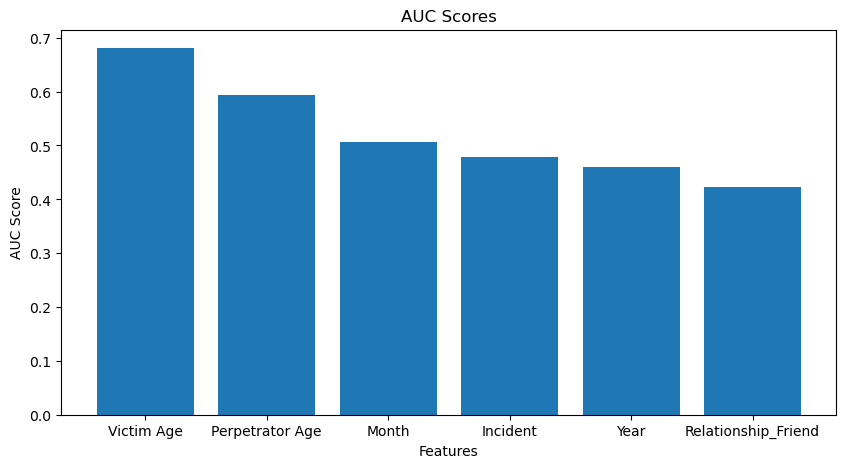

In [152]:
xpl = ['Victim Age', 'Perpetrator Age', 'Month', 'Incident', 'Year', 'Relationship_Friend']

ypl = [select_auc_00, select_auc_01, select_auc_02, select_auc_03, select_auc_04, select_auc_05]

ypl.sort(reverse = True)

plt.figure(figsize = (10, 5))
plt.bar(xpl, ypl)
plt.xlabel('Features')
plt.ylabel('AUC Score')
plt.title('AUC Scores')
plt.show()